In [19]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix,classification_report,ConfusionMatrixDisplay


df = pd.read_csv('Churn_Modelling.csv')

df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


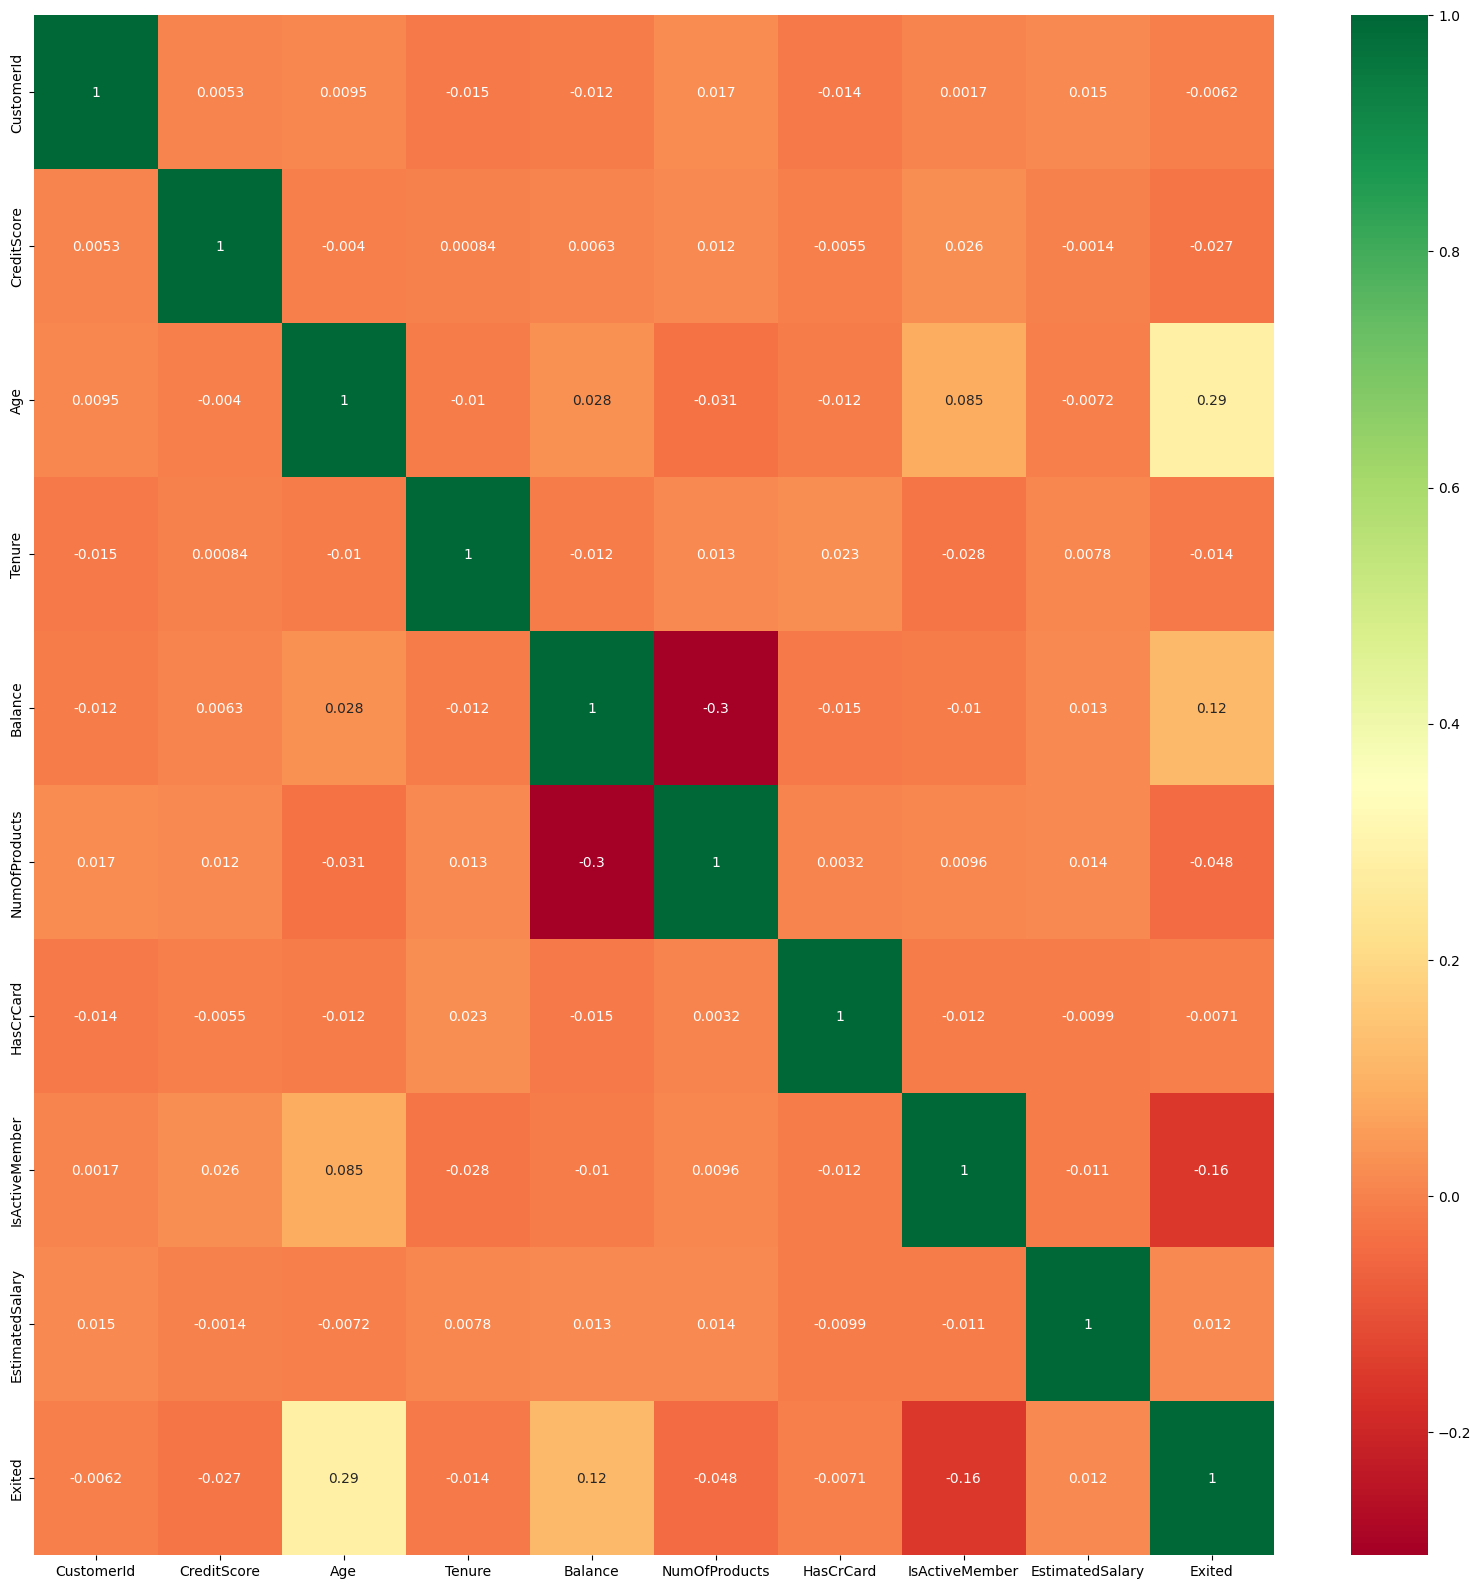

In [20]:
numerical_features = [features for features in df.columns if df[features].dtypes != 'O' and 'RowNumber' not in features]
numerical_features

data = pd.DataFrame(df[numerical_features],columns=numerical_features)

plt.figure(figsize=(20,20))
g=sns.heatmap(data[numerical_features].corr(),annot=True,cmap="RdYlGn")



In [21]:
x = df.iloc[:,3:13]
y = df.iloc[:,-1:]

geography = pd.get_dummies(x['Geography'],drop_first=True)
geography.head()

,Germany,Spain
0,False,False
1,False,True
2,False,False
3,False,False
4,False,True


In [22]:
gender = pd.get_dummies(x['Gender'],drop_first=True)
gender.head()

,Male
0,False
1,False
2,False
3,False
4,False


In [23]:
x = x.drop(['Geography','Gender'],axis=1)
x.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,42,2,0.00,1,1,1,101348.88
1,608,41,1,83807.86,1,0,1,112542.58
2,502,42,8,159660.80,3,1,0,113931.57
3,699,39,1,0.00,2,0,0,93826.63
4,850,43,2,125510.82,1,1,1,79084.10


In [24]:
x = pd.concat([x,geography,gender],axis=1)
x.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
0,619,42,2,0.00,1,1,1,101348.88,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,False,True,False
2,502,42,8,159660.80,3,1,0,113931.57,False,False,False
3,699,39,1,0.00,2,0,0,93826.63,False,False,False
4,850,43,2,125510.82,1,1,1,79084.10,False,True,False


In [25]:
from datetime import datetime


def timer(start_time = None):
    if not start_time:
        start_time = datetime.now()
        return start_time
    elif start_time:
        thour, temp_sec = divmod((datetime.now() - start_time).total_seconds(),3600)
        tmin, tsec = divmod(temp_sec,60)
        print('\n Time taken: %i hours %i minutes and %s seconds.' % (thour,tmin,round(tsec,2)))

In [26]:
# Hyper Parameter Opttimization

from sklearn.model_selection import RandomizedSearchCV
import xgboost

params = {
    "learning_rate" : [0.05,0.10,0.15,0.20,0.25,0.30],
    "max_depth" : [3,4,5,6,8,10,12,15],
    "min_child_weight" : [1,3,5,7],
    "gamma" : [0.0,0.1,0.2,0.3,0.4],
    "colsample_bytree" : [0.3,0.4,0.5,0.7]
}

In [27]:
classifier = xgboost.XGBClassifier()
random_search = RandomizedSearchCV(classifier,param_distributions=params,n_iter=5,scoring='roc_auc',n_jobs=-1,cv=5,verbose=3)

In [28]:
start_time = timer(None)
random_search.fit(x,y)
timer(start_time)

Fitting 5 folds for each of 5 candidates, totalling 25 fits

 Time taken: 0 hours 0 minutes and 2.34 seconds.


In [29]:
x.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
0,619,42,2,0.00,1,1,1,101348.88,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,False,True,False
2,502,42,8,159660.80,3,1,0,113931.57,False,False,False
3,699,39,1,0.00,2,0,0,93826.63,False,False,False
4,850,43,2,125510.82,1,1,1,79084.10,False,True,False


In [30]:
random_search.best_estimator_

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.7, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.2, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.2, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=3, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [31]:
random_search.best_params_

{'min_child_weight': 3,
 'max_depth': 3,
 'learning_rate': 0.2,
 'gamma': 0.2,
 'colsample_bytree': 0.7}

In [36]:
classifier=xgboost.XGBClassifier(min_child_weight=5,max_depth=4,learning_rate=0.1,gamma=0.1,colsample_bytree=0.4)
from sklearn.model_selection import cross_val_score

score = cross_val_score(classifier,x,y,cv=10)
print("Score: {}".format(score))

Score: [0.872 0.862 0.877 0.868 0.863 0.854 0.868 0.88  0.861 0.857]


In [37]:
print("Score Mean: {}".format(score.mean()))

Score Mean: 0.8661999999999999
